# 1. Import dependencies

In [10]:
import numpy as np 
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from helpers import plot
from pre_processing import binary, skeletonize, normalize

# 2. Load dataset

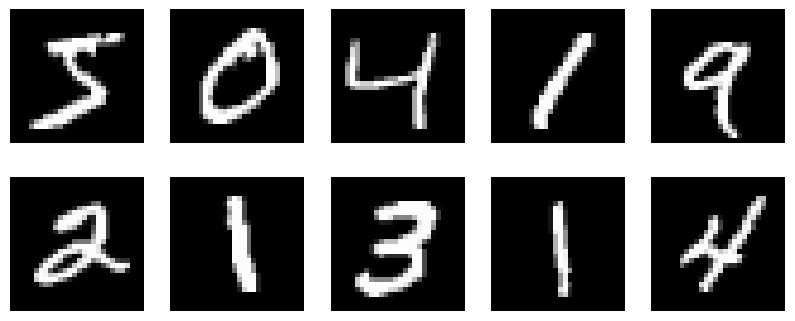

In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
plot.display_imgs(x_train)


# 3. Preprocessing

In [12]:
"""
Pre processing:
    - Binarization
    - Normalization
    - Encoding classes
"""
def pre_processing(X, y, encoder = None):
    # Binarization
    binarized = np.array([
        binary.binary(img) for img in tqdm(X, desc = "Binarying...")
    ])

    # Normalization
    normalized = np.array([
        normalize.normalize(img) for img in tqdm(X, desc = "Normalizing...")
    ])
    
    # Classes
    classes = np.unique(y)

    # Encoding classes
    if encoder is None:
        encoder = OneHotEncoder()
        encoder.fit(y_train.reshape((-1, 1)))
    
    y = encoder.transform(y.reshape((-1, 1))).toarray()
    return normalized, y, encoder, classes

In [13]:
x_train, y_train, encoder, classes = pre_processing(x_train, y_train)
x_test, y_test, encoder, classes = pre_processing(x_test, y_test, encoder)

Normalizing...: 100%|██████████| 10000/10000 [00:00<00:00, 225989.86it/s]


# 4. Model eval

## 4.1. Softmax Regression

In [14]:
from models import Softmax_Regression

softmax_regression = Softmax_Regression.SoftmaxRegression(
    input_shape = x_train[0].shape,
    output_shape = len(classes),
    learning_rate = 0.1,
    epochs = 15,
    batchsize = 16
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8560 - loss: 0.5190 - val_accuracy: 0.9119 - val_loss: 0.3088
Epoch 2/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9128 - loss: 0.3084 - val_accuracy: 0.9190 - val_loss: 0.2872
Epoch 3/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9142 - loss: 0.2976 - val_accuracy: 0.9173 - val_loss: 0.2913
Epoch 4/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9198 - loss: 0.2820 - val_accuracy: 0.9230 - val_loss: 0.2804
Epoch 5/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9209 - loss: 0.2771 - val_accuracy: 0.9227 - val_loss: 0.2813
Epoch 6/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 993us/step - accuracy: 0.9237 - loss: 0.2754 - val_accuracy: 0.9227 - val_loss: 0.2777
Epoch 7/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9207 - loss: 0.2802 - val_accuracy: 0.9199 - val_loss: 0.2832
Epoch 8/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9261 - loss: 0.2628 

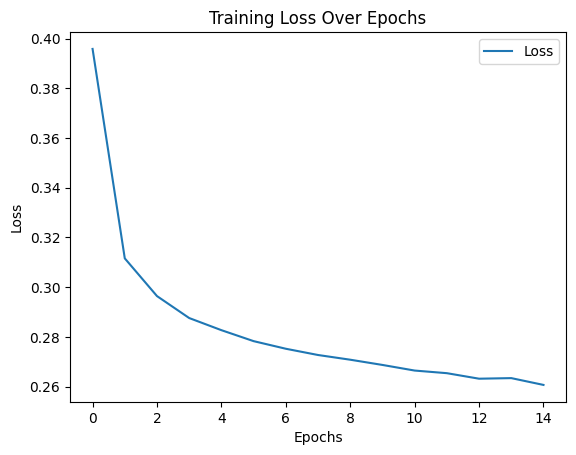

In [15]:
softmax_regression.fit(X = x_train, y = y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
Accuracy: 0.9218

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.90      0.90      0.90      1010
           4       0.95      0.90      0.93       982
           5       0.92      0.86      0.89       892
           6       0.91      0.97      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.91      0.85      0.88       974
           9       0.88      0.92      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



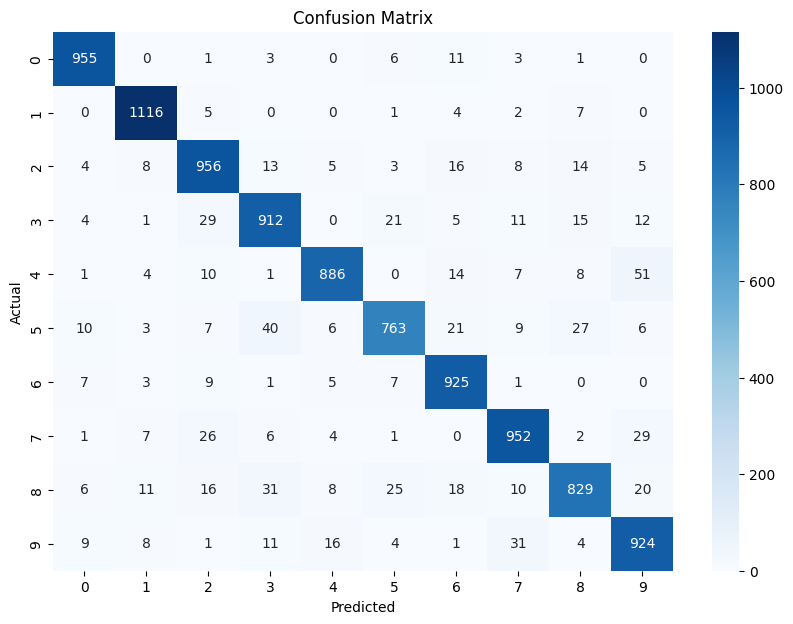

In [16]:
y_predict_prob = softmax_regression.predict(x_test)
y_predict = np.argmax(y_predict_prob, axis = 1)
y_true = np.argmax(y_test, axis = 1)

accuracy = accuracy_score(y_true, y_predict)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_predict))

conf_matrix = confusion_matrix(y_true, y_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 4.2. Basic 5 layers CNN

In [17]:
from models import Basic_CNN

if len(x_train[0].shape) != 3:
    x_train = np.expand_dims(x_train, axis=-1)

x_train.shape

(60000, 28, 28, 1)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8283 - loss: 0.5301 - val_accuracy: 0.9638 - val_loss: 0.1394
Epoch 2/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9303 - loss: 0.2422 - val_accuracy: 0.9638 - val_loss: 0.1492
Epoch 3/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9340 - loss: 0.2388 - val_accuracy: 0.9628 - val_loss: 0.1346
Epoch 4/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9338 - loss: 0.2378 - val_accuracy: 0.9656 - val_loss: 0.1331
Epoch 5/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9375 - loss: 0.2269 - val_accuracy: 0.9740 - val_loss: 0.1240
Epoch 6/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9358 - loss: 0.2361 - val_accuracy: 0.9718 - val_loss: 0.1220
Epoch 7/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9372 - loss: 0.2403 - val_accuracy: 0.9692 - val_loss: 0.1198
Epoch 8/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9352 - loss: 0.2421 

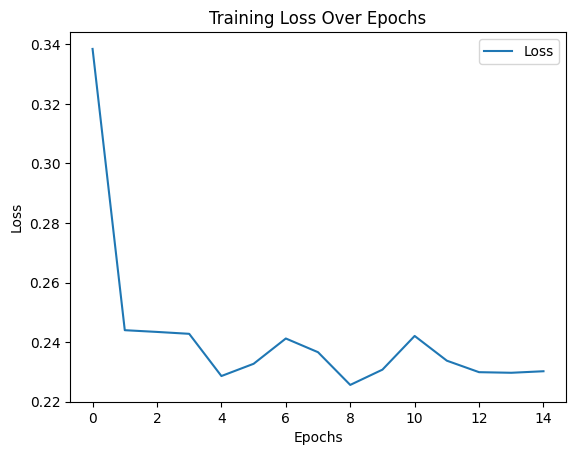

In [18]:
basic_cnn = Basic_CNN.BasicCNN(
    input_shape = x_train[0].shape,
    output_shape = len(classes),
    lr = 0.01,
    epochs = 15,
    batch_size = 16
)

basic_cnn.fit(x_train, y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9629

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.99      0.97      0.98      1135
           2       0.94      0.98      0.96      1032
           3       0.98      0.96      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.96      0.97      0.97       892
           6       0.99      0.91      0.95       958
           7       0.98      0.94      0.96      1028
           8       0.93      0.97      0.95       974
           9       0.93      0.98      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



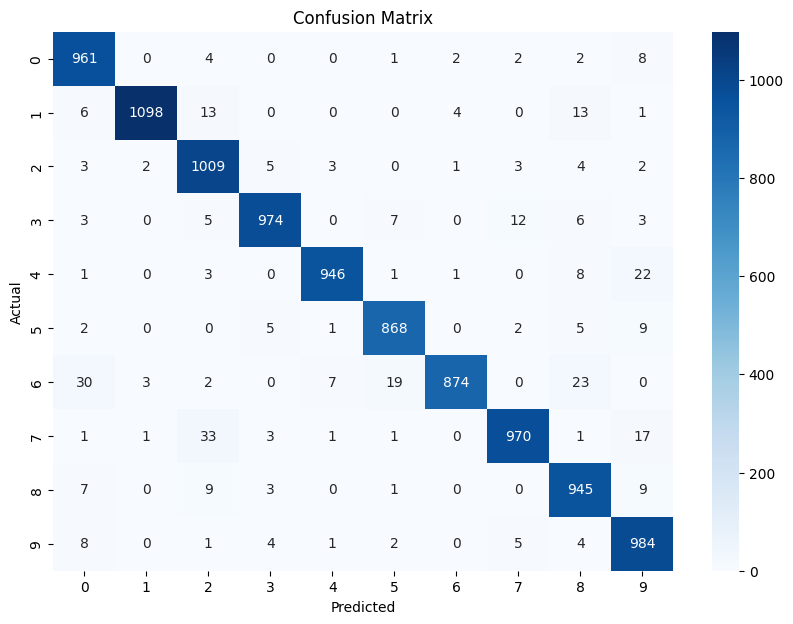

In [19]:
if len(x_test[0].shape) != 3:
    x_test = np.expand_dims(x_test, axis=-1)

y_predict_prob = basic_cnn.predict(x_test)
y_predict = np.argmax(y_predict_prob, axis = 1)
y_true = np.argmax(y_test, axis = 1)

accuracy = accuracy_score(y_true, y_predict)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_predict))

conf_matrix = confusion_matrix(y_true, y_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()